# ** 11.HDBSCAN Code 실습**

[목적]
  - 비지도학습 중 하나인 Clustering 중 HDBSCAN 실습
  - For loop 활용 Hyperparameter(1개) 변경시켜 가며 실습 진행
  
[Process]
  1. Define X's
  2. Modeling

In [2]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039163 sha256=cf4f724c0d6d82f2e0f38b7fc5a2067c4d7161b0a271e193976b31b3ca12c182
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.2
    Uninstalling Cython-3.0.2:
      Successfully uninstalled Cython-3.0.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import hdbscan

In [4]:
#plt 와 sns Setting
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

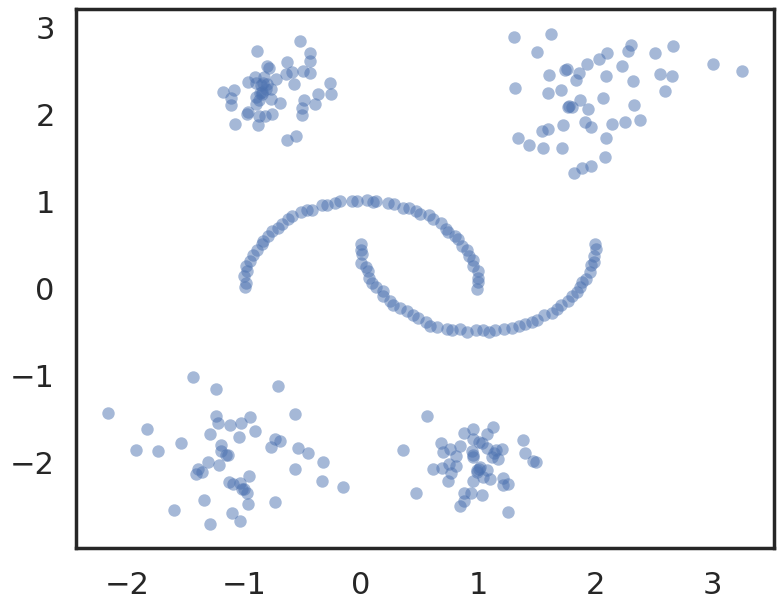

In [5]:
# Sample Data 만들기
num=100
moons, _ = data.make_moons(n_samples=num, noise=0.01)
blobs, _ = data.make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = data.make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

[HDBSCAN]
  - Hyperparameter Tuning using for Loop

[HDBSCAN Parameters]
  - Packge : https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
  - min_cluster : Cluster 안에 적어도 몇개가 있어야 하는지
  - cluster_selection_epsilon : combining HDBSACN with DBSCAN

min_cluster_size : 3


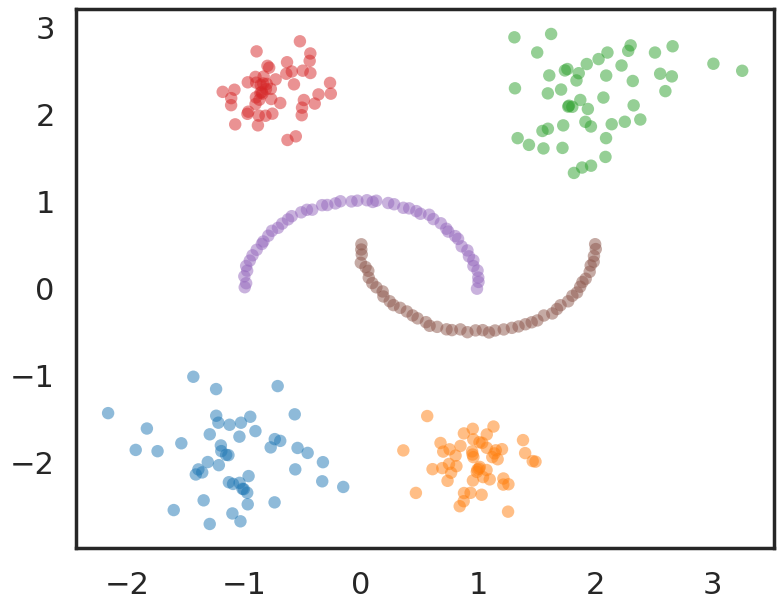

min_cluster_size : 5


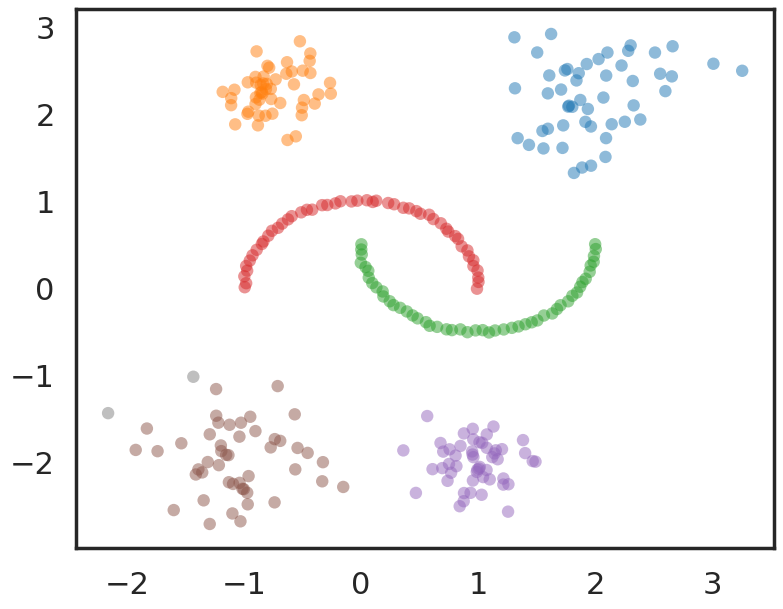

min_cluster_size : 10


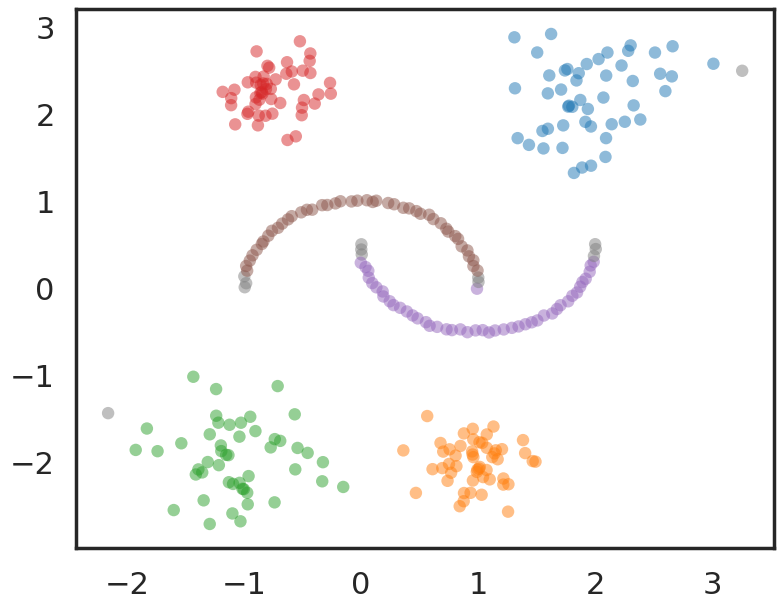

min_cluster_size : 15


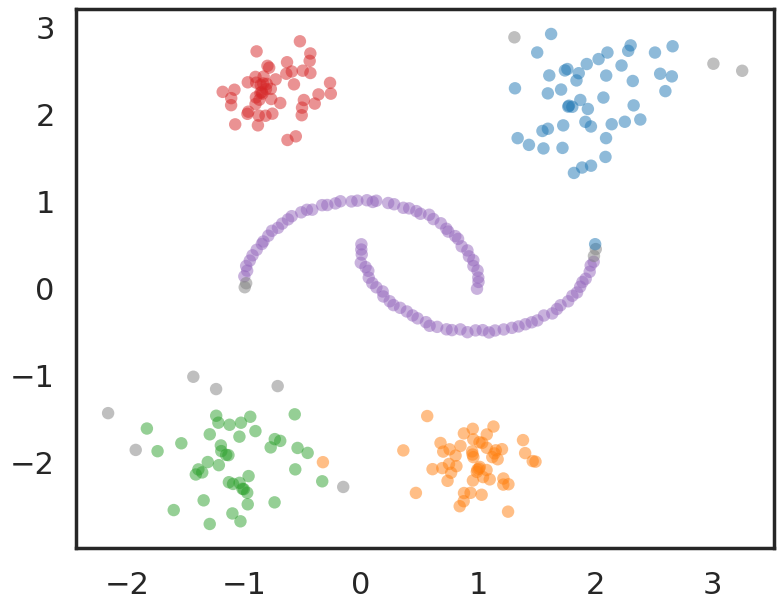

min_cluster_size : 20


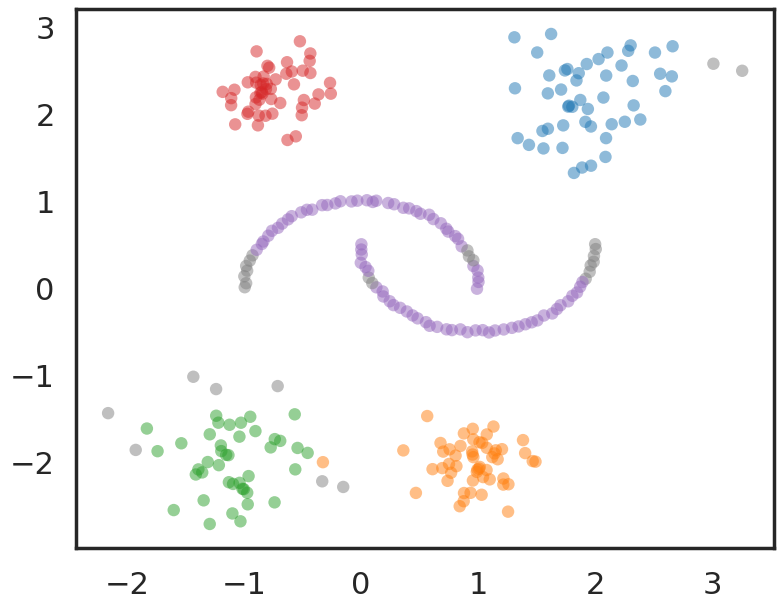

min_cluster_size : 30


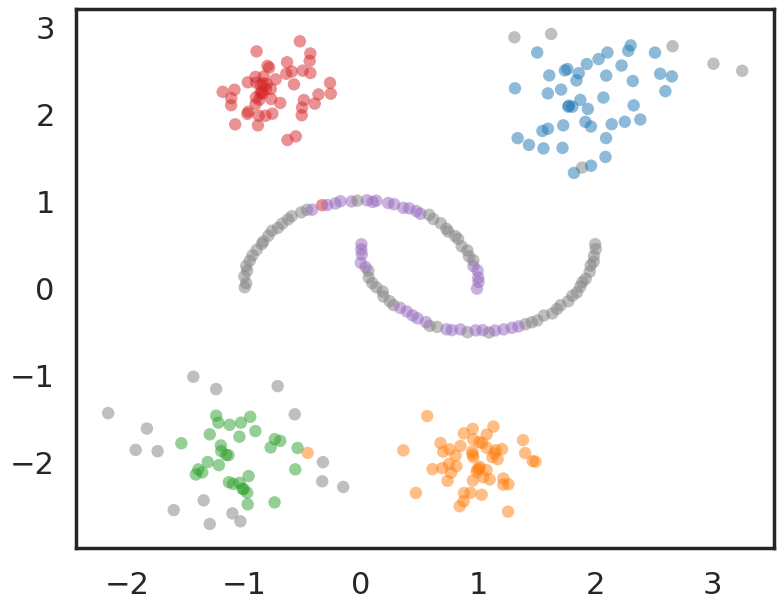

In [6]:
minsize = [3, 5, 10, 15, 20, 30]
for m in minsize:
    print("min_cluster_size : {}".format(m))
    db = hdbscan.HDBSCAN(min_cluster_size=m).fit(test_data)
    palette = sns.color_palette()
    cluster_colors = [palette[col]
                    if col >= 0 else (0.5, 0.5, 0.5) for col in
                    db.labels_]
    plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
    plt.show()